<a href="https://colab.research.google.com/github/roykingshuk/detect-abusive-comment/blob/main/train/svm_kingshuk_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Neccessary Libraries**

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.pipeline import make_union
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Uncomment the below code if the notebook is run on Google Colab.
!git clone https://github.com/abirmondal/detect-abusive-comment.git

Cloning into 'detect-abusive-comment'...
remote: Enumerating objects: 192, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 192 (delta 40), reused 58 (delta 16), pack-reused 97
Receiving objects: 100% (192/192), 37.44 MiB | 20.14 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [23]:
utils_folder_path = '/content/detect-abusive-comment/src/utils'

import os
os.chdir(utils_folder_path)

import pandas as pd
import model_report as mr
import dataset as ds

**Splitting the dataset for Training and Testing**

In [25]:
train_file_loc = '/content/detect-abusive-comment/data/m_dataset_21_9/dataset_12_10/train.csv'
df_train = pd.read_csv(train_file_loc)

test_file_loc = '/content/detect-abusive-comment/data/m_dataset_21_9/dataset_12_10/test.csv'
df_test = pd.read_csv(test_file_loc)

val_file_loc = '/content/detect-abusive-comment/data/m_dataset_21_9/dataset_12_10/val.csv'
df_val = pd.read_csv(val_file_loc)

train_x, test_x, val_x = df_train['text'].to_list(), df_test['text'].to_list(), df_val['text'].to_list()
train_y,test_y, val_y = df_train['hate'].values, df_test['hate'].values, df_val['hate'].values,

dataset_details = ds.get_dataset_details()

print('\nTraining Set :-', df_train.count(), sep="\n")
print('\nTesting Set :-', df_test.count(), sep="\n")
print('\nValidation Set :-',df_val.count(), sep="\n")
print('\nHate Counts in Training Set :-', df_train['hate'].value_counts(), sep="\n")
print('\nHate Counts in Testing Set :-', df_test['hate'].value_counts(), sep="\n")
print('\nHate Counts in Validation Set :-',df_val['hate'].value_counts(), sep="\n")

Dataset Details:-
  Dataset Name: m_dataset_21_9
   Total Count: 90345
     Train Set: 63241 ( 70.0% )
      Test Set: 18069 ( 20.0% )
Validation Set:  9035 ( 10.0% )

Training Set :-
text    63241
hate    63241
dtype: int64

Testing Set :-
text    18069
hate    18069
dtype: int64

Validation Set :-
text    9035
hate    9035
dtype: int64

Hate Counts in Training Set :-
0    36419
1    26822
Name: hate, dtype: int64

Hate Counts in Testing Set :-
0    10406
1     7663
Name: hate, dtype: int64

Hate Counts in Validation Set :-
0    5203
1    3832
Name: hate, dtype: int64


**Tokenization and Vectorization**

In [26]:
def token(doc):
  import nltk
  tokens = nltk.word_tokenize(doc)
  return tokens

# word unigram TFIDF vectorizer(U)
u = TfidfVectorizer(strip_accents = None, tokenizer = token, analyzer = 'word',  ngram_range = (1,1))

# char ngram TFIDF vectorizer(C)
c2345 = TfidfVectorizer(strip_accents = None, tokenizer = token, analyzer = 'char',  ngram_range = (2,5))

# word unigram + char ngram TFIDF vectorizer(U + C)
w = TfidfVectorizer(strip_accents = None, tokenizer = token, analyzer = 'word',  ngram_range = (1,1))
c = TfidfVectorizer(strip_accents = None, tokenizer = token, analyzer = 'char',  ngram_range = (2,5))
u_c2345 = make_union(w, c, n_jobs = -1)

features = {
    'SVM + U':u, 'SVM + C':c2345, 'SVM + U + C':u_c2345
}

**LinearSVC Model Implementation**

In [30]:
target_names = ['NH', 'HS']  # NH/HS
ngram = []
nh_precision = []
nh_recall = []
nh_f1score = []
hs_precision = []
hs_recall = []
hs_f1score = []
w_precision = []
w_recall = []
w_f1score = []

def rnd(var):    # rounding off upto four decimal places
  rounded_var = round(var * 100, 2)
  return rounded_var

for feature in features.keys():
  vec = features[feature]

  train_vector = vec.fit_transform(train_x)
  test_vector = vec.transform(test_x)

  model = LinearSVC(penalty = 'l2', loss = 'hinge', C = 1)
  model.fit(train_vector, train_y)
  prediction = model.predict(test_vector)

  r = metrics.classification_report(test_y, prediction, target_names = target_names, output_dict = True)
  ngram.append(feature)

  nh_precision.append(rnd(r['NH']['precision']))
  nh_recall.append(rnd(r['NH']['recall']))
  nh_f1score.append(rnd(r['NH']['f1-score']))

  hs_precision.append(rnd(r['HS']['precision']))
  hs_recall.append(rnd(r['HS']['recall']))
  hs_f1score.append(rnd(r['HS']['f1-score']))

  w_precision.append(rnd(r['weighted avg']['precision']))
  w_recall.append(rnd(r['weighted avg']['recall']))
  w_f1score.append(rnd(r['weighted avg']['f1-score']))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:563: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to

In [31]:
result = {  'Ngram feature' : ngram,
    'NH precision' : nh_precision, 'NH recall' : nh_recall, 'NH F1' : nh_f1score,
    'HS precision' : hs_precision, 'HS recall' : hs_recall, 'HS F1' : hs_f1score,
    'Weighted avg precision' : w_precision, 'Weighted avg recall' : w_recall, 'Weighted avg F1' : w_f1score,
}

**Model Result**

Accuracy Score:  0.9072997952293984
     Precision:  0.8999465669249266
        Recall:  0.8791595980686415
      F1-Score:  0.8894316456531784
Classification Report :-
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     10406
           1       0.90      0.88      0.89      7663

    accuracy                           0.91     18069
   macro avg       0.91      0.90      0.90     18069
weighted avg       0.91      0.91      0.91     18069



,Ngram feature,NH precision,NH recall,NH F1,HS precision,HS recall,HS F1,Weighted avg precision,Weighted avg recall,Weighted avg F1
0,SVM + U,88.19,93.29,90.67,90.11,83.04,86.43,89.01,88.94,88.87
1,SVM + C,90.58,93.40,91.97,90.64,86.81,88.68,90.60,90.60,90.57
2,SVM + U + C,91.25,92.80,92.02,89.99,87.92,88.94,90.72,90.73,90.71


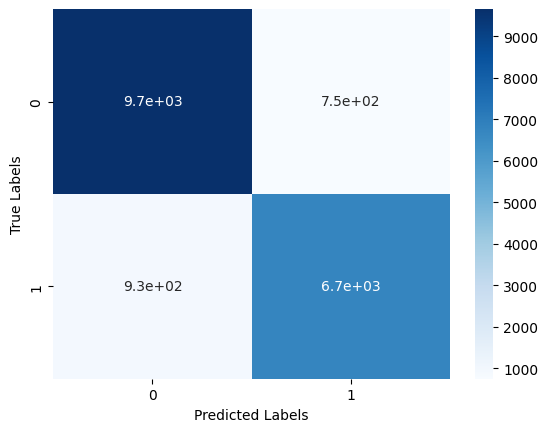

In [32]:
df_result = pd.DataFrame(data = result)
confusion_matrix_sklearn = metrics.confusion_matrix(test_y, prediction)
sns.heatmap(confusion_matrix_sklearn, annot = True, cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
print('Accuracy Score: ', metrics.accuracy_score(test_y, prediction))
print('     Precision: ', metrics.precision_score(test_y, prediction))
print('        Recall: ', metrics.recall_score(test_y, prediction))
print('      F1-Score: ', metrics.f1_score(test_y, prediction))
print('Classification Report :-', metrics.classification_report(test_y, prediction), sep="\n")

df_result